In [1]:
import pandas as pd
import time #to have today's date
timestr = time.strftime("%Y%m%d")
import matplotlib.pyplot as plt #for plots
var_text_size = 15 #for font size in graphs


Bad key text.latex.preview in file c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('save

In [2]:
# update to newest version of the dataframes!
# for df_topics_categories:
var_time_a = '20220517'

In [7]:
#get dataframe with the topics, numbers, names, categories and keywords
#from p_08_name&cluster_topics
df_topics_categories = pd.read_csv\
('.//results//master_dfs//category_numname_topics_numname_orinew_keywords_lambda_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

In [8]:
set(df_topics_categories['Category_label'])

{'Actors & interests',
 'Electric power system',
 'Energy governance & markets',
 'Policies'}

In [10]:
#for each country the percentage for each topic
df_country_topics_share = pd.read_csv('.//results//master_dfs//country_topics_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

#for each actors group (classification) the percentage for each topic
df_class_topics_share = pd.read_csv('.//results//master_dfs//class_topics_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

#for each actors group in each country the percentage for each topic
df_country_class_topics_share = pd.read_csv('.//results//master_dfs//country_AND_class_topics_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

In [11]:
#merge the two columns country and class so I can analyse them together as well!
def merge_country_class(df):
    df_c_c = df.copy()
    df_c_c['Country_class'] = ['_'.join(i) for i in zip(df_c_c['Country'], df_c_c['class'])]
    df_c_c.drop(columns={'Country', 'class'}, inplace=True)
    return(df_c_c)

In [12]:
#merge the two columns:
df_c_c_topic = merge_country_class(df_country_class_topics_share)

#create dictionary with all three dicts
dict_topics = {'Country':df_country_topics_share, 'class':df_class_topics_share, 
               'Country_class': df_c_c_topic}

In [13]:
df_country_categories_share = pd.read_csv('.//results//master_dfs//country_categories_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

df_class_categories_share = pd.read_csv('.//results//master_dfs//class_categories_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

df_country_class_categories_share = pd.read_csv('.//results//master_dfs//country_AND_class_categories_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

In [14]:
#merge the two columns:
df_c_c_category = merge_country_class(df_country_class_categories_share)

dict_category = {'Country':df_country_categories_share, 'class':df_class_categories_share, 
               'Country_class': df_c_c_category}

In [15]:
#make dictionary with the two dicts:
dict_t_and_c = {'Topic':dict_topics, 'Category':dict_category}

# do Heatmap

## Absolute shares

### each country/actors group is 100%

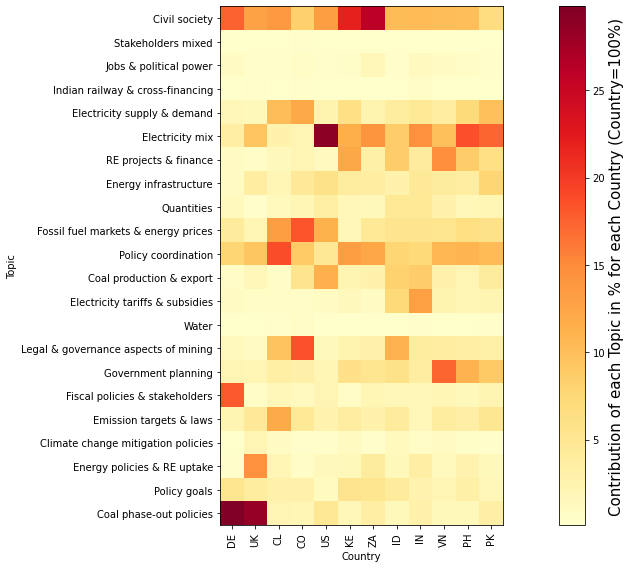

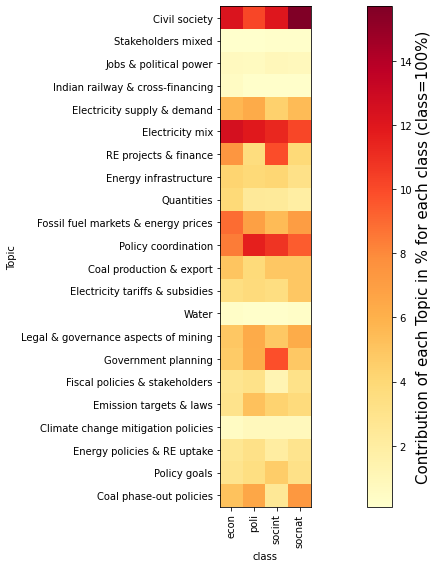

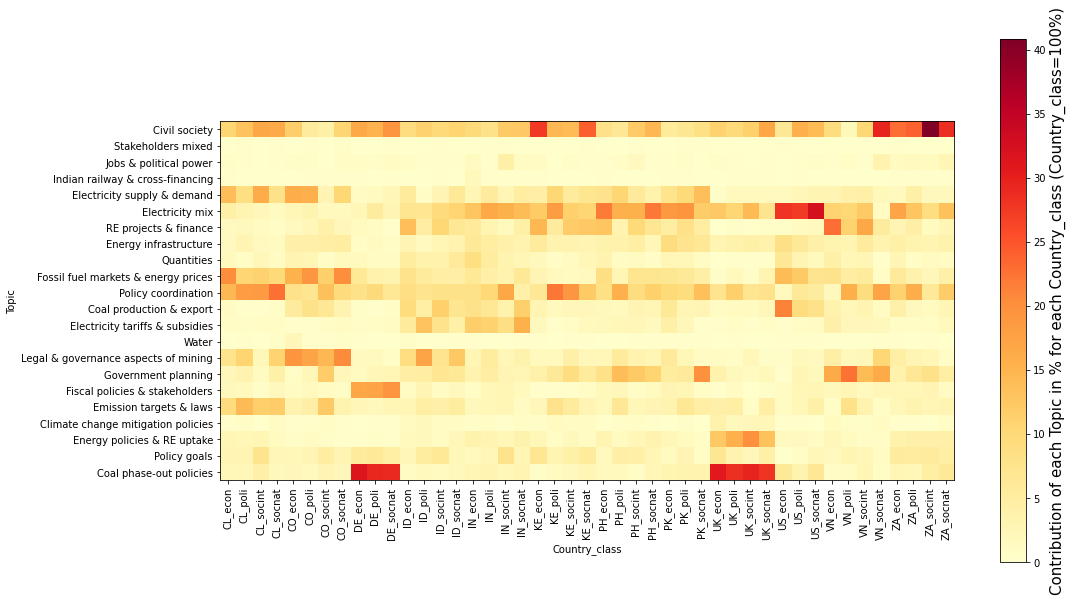

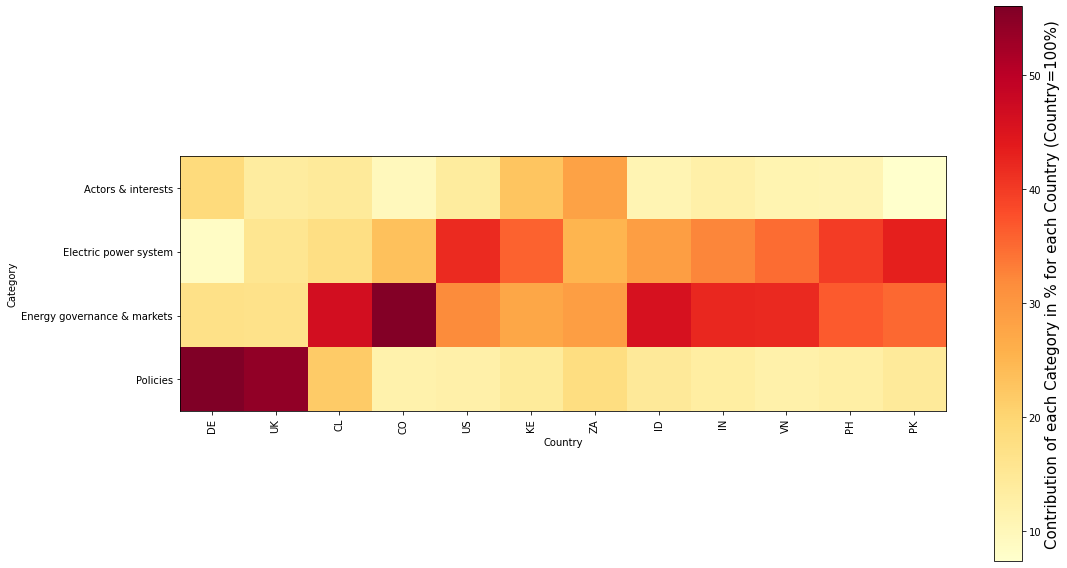

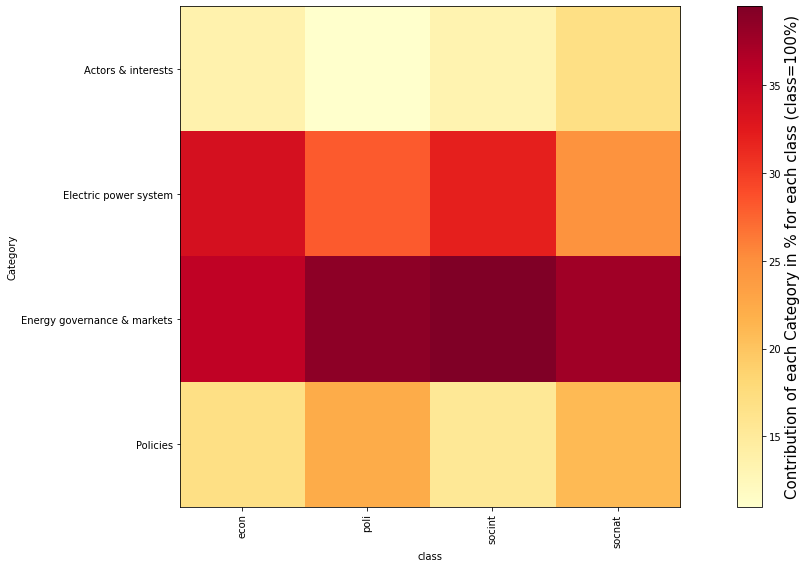

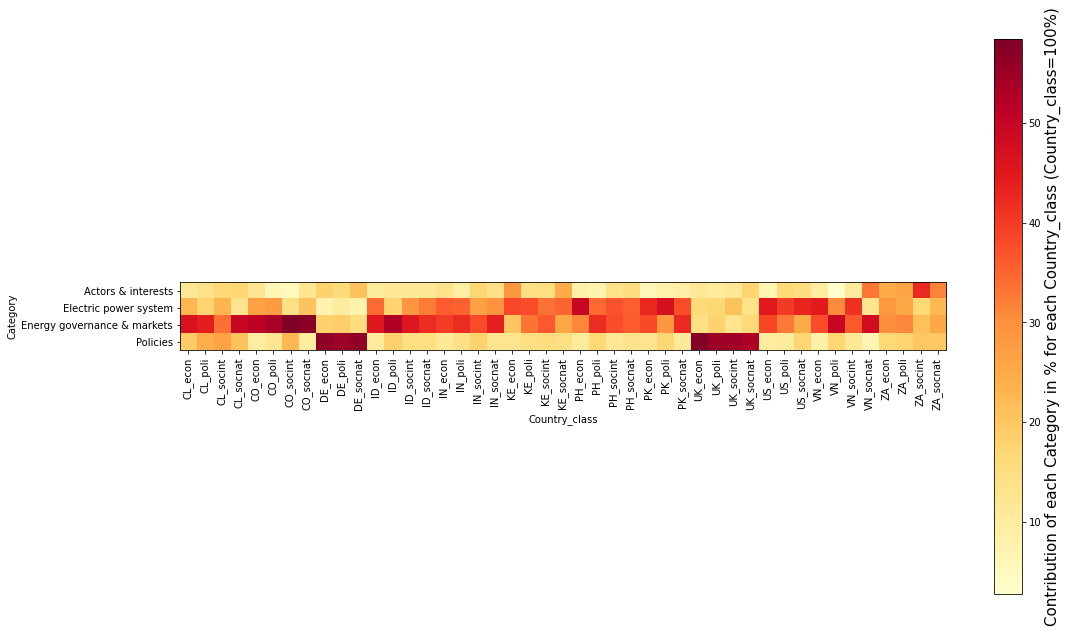

In [30]:
# https://stackoverflow.com/questions/43330205/heatmap-from-columns-in-pandas-dataframe
for z in dict_t_and_c: # 'Topic' / 'Category'
    if z == 'Topic':
        list_t_or_c_labels = df_topics_categories[z+'_label']
    if z == 'Category':
        list_t_or_c_labels = df_topics_categories.sort_values('Category_num').drop_duplicates('Category_num')['Category_label']
    var_num_t_or_c = len(set(df_topics_categories[z+'_num']))
    
    for x in dict_t_and_c[z]: # 'Country' / 'class' / 'Country_class'
        #transpose, so the topic are the rows and the countries are the columns
        piv = dict_t_and_c[z][x].drop(columns={x}).transpose()
        list_A = list(dict_t_and_c[z][x][x])
        # do heatmap, showing the topics/categories and the countries/classification 
        fig, ax = plt.subplots(figsize=(16,8))
        im = ax.imshow(piv, cmap='YlOrRd')#"Greens")

        ax.set_xticks(range(len(piv.columns)))
        ax.set_yticks(range(len(piv.index)))
        ax.set_xticklabels(list_A, rotation=90, size=var_text_size-5)
        ax.set_yticklabels(list_t_or_c_labels, size=var_text_size-5)
        ax.set_xlabel(x)
        ax.set_ylabel(z)

        #set label for colorbar
        cb = plt.colorbar(im)
        cb.set_label('Contribution of each '+z+' in % for each '+x+' ('+x+'=100%)', size=var_text_size)

        # Loop over data dimensions and create text annotations (% on the map)
        #for i in range(len(list_t_or_c_labels)):
        #    for j in range(len(countries)):
        #        text = ax.text(j, i, piv.loc[str(i), j],
        #                       ha="center", va="center", color="k")

        plt.tight_layout()

        for y in ['png', 'svg']: # 
            plt.savefig('.//results//heatmaps//'+x+'_'+str(len(list_A))+'_for_'+str(var_num_t_or_c)+'_'+z+'_'+timestr+'_V01.'+y, \
                   bbox_inches="tight") # , dpi=600

        plt.show()

### do everything for share of topic over country! each topic is 100%

In [31]:
#for each country the percentage for each topic
df_country_topics_share_T = pd.read_csv('.//results//master_dfs//country_topics_share_T_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

#for each actors group (classification) the percentage for each topic
df_class_topics_share_T = pd.read_csv('.//results//master_dfs//class_topics_share_T_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

#for each actors group in each country the percentage for each topic
df_country_class_topics_share_T = pd.read_csv('.//results//master_dfs//country_AND_class_topics_share_T_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

In [32]:
#merge the two columns:
df_c_c_topic_T = merge_country_class(df_country_class_topics_share_T)

#create dictionary with all three dicts
dict_topics_T = {'Country':df_country_topics_share_T, 'class':df_class_topics_share_T, 
               'Country_class': df_c_c_topic_T}

In [33]:
df_country_categories_share_T = pd.read_csv('.//results//master_dfs//country_categories_share_T_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

df_class_categories_share_T = pd.read_csv('.//results//master_dfs//class_categories_share_T_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

df_country_class_categories_share_T = pd.read_csv('.//results//master_dfs//country_AND_class_categories_share_T_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

In [34]:
#merge the two columns:
df_c_c_category_T = merge_country_class(df_country_class_categories_share_T)

dict_category_T = {'Country':df_country_categories_share_T, 'class':df_class_categories_share_T, 
               'Country_class': df_c_c_category_T}

In [35]:
#make dictionary with the two dicts:
dict_t_and_c_T = {'Topic':dict_topics_T, 'Category':dict_category_T}

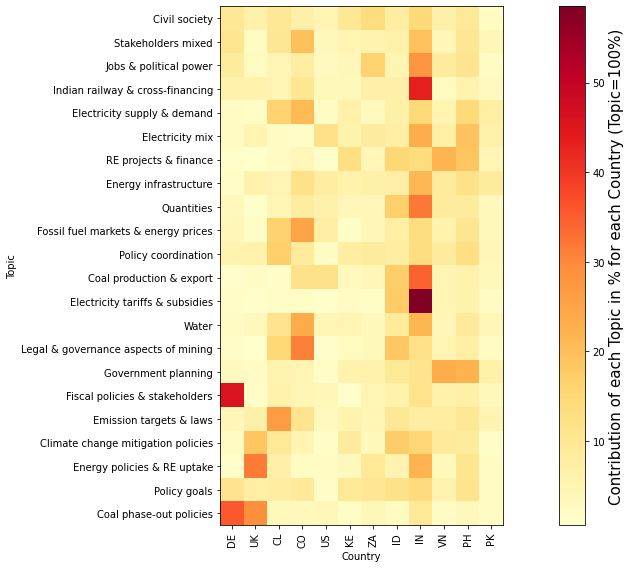

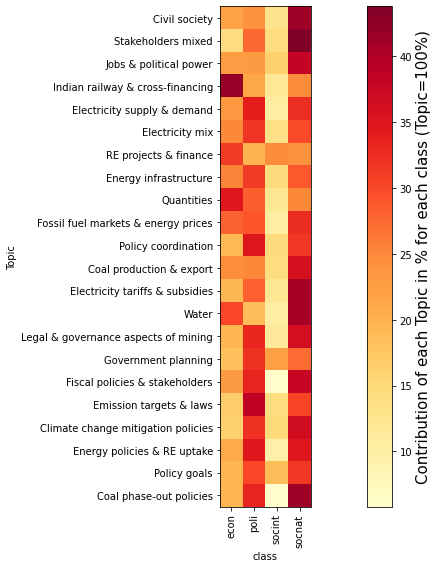

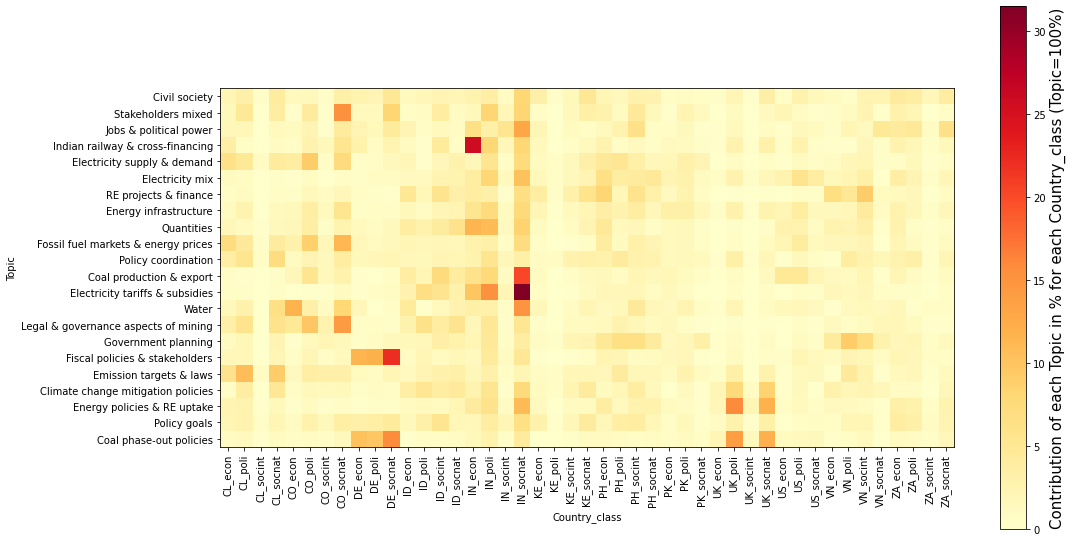

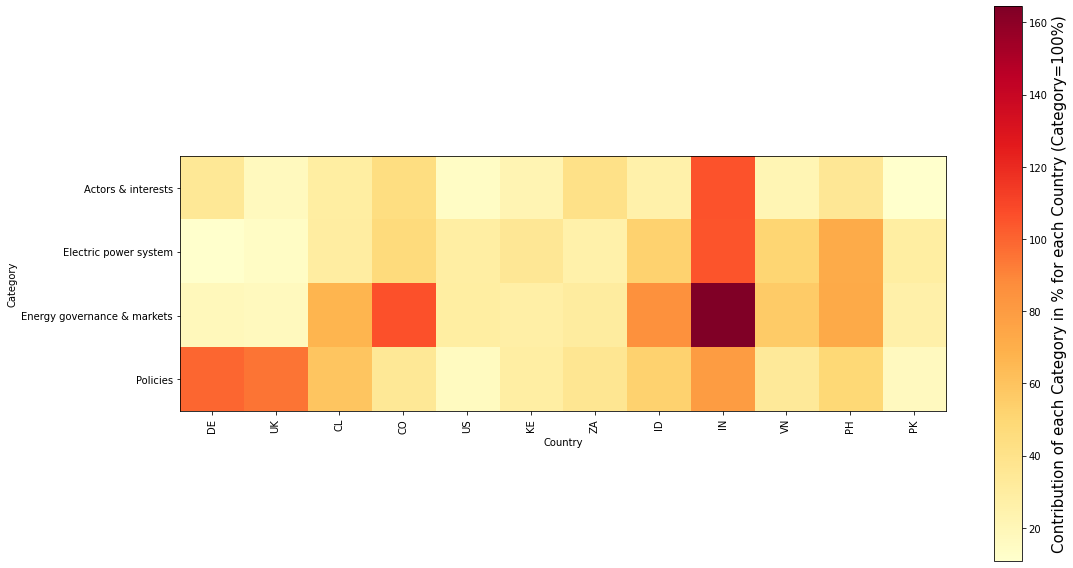

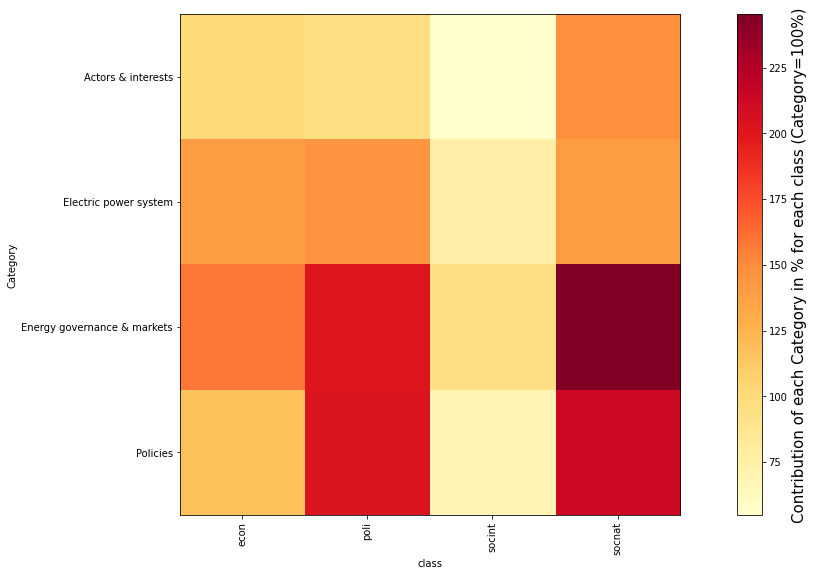

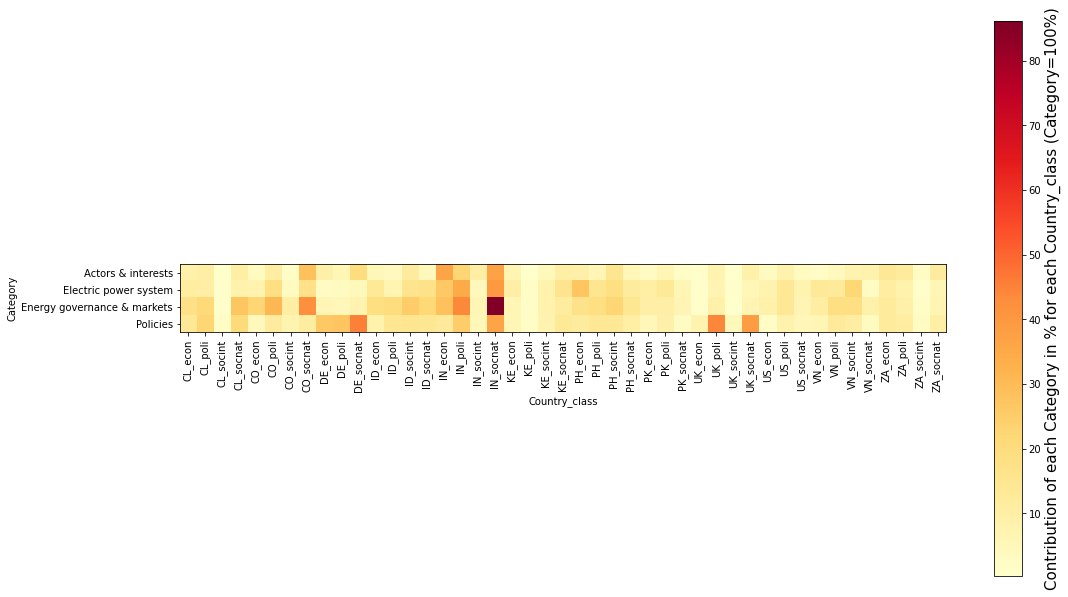

In [36]:
# https://stackoverflow.com/questions/43330205/heatmap-from-columns-in-pandas-dataframe
for z in dict_t_and_c_T: # 'Topic' / 'Category'
    if z == 'Topic':
        list_t_or_c_labels_T = df_topics_categories[z+'_label']
    if z == 'Category':
        list_t_or_c_labels_T = df_topics_categories.sort_values('Category_num').drop_duplicates('Category_num')['Category_label']
    var_num_t_or_c_T = len(set(df_topics_categories[z+'_num']))
    
    for x in dict_t_and_c_T[z]: # 'Country' / 'class' / 'Country_class'
        #transpose, so the topic are the rows and the countries are the columns
        piv_T = dict_t_and_c_T[z][x].drop(columns={x}).transpose()
        list_A_T = list(dict_t_and_c_T[z][x][x])
        # do heatmap, showing the topics/categories and the countries/classification 
        fig, ax = plt.subplots(figsize=(16,8))
        im = ax.imshow(piv_T, cmap='YlOrRd')

        ax.set_xticks(range(len(piv_T.columns)))
        ax.set_yticks(range(len(piv_T.index)))
        ax.set_xticklabels(list_A_T, rotation=90, size=var_text_size-5)
        ax.set_yticklabels(list_t_or_c_labels_T, size=var_text_size-5)
        ax.set_xlabel(x)
        ax.set_ylabel(z)

        #set label for colorbar
        cb = plt.colorbar(im)
        cb.set_label('Contribution of each '+z+' in % for each '+x+' ('+z+'=100%)', size=var_text_size)

        # Loop over data dimensions and create text annotations (% on the map)
        #for i in range(len(list_t_or_c_labels_T)):
        #    for j in range(len(countries)):
        #        text = ax.text(j, i, piv_T.loc[str(i), j],
        #                       ha="center", va="center", color="k")

        plt.tight_layout()

        for y in ['png', 'svg']: 
            plt.savefig('.//results//heatmaps//T_'+x+'_'+str(len(list_A_T))+'_for_'+str(var_num_t_or_c_T)+'_'+z+'_'+timestr+'_V01.'+y, \
                   bbox_inches="tight") # , dpi=600

        plt.show()

## deviation from mean (15.08.2022)

### each country/actors group is 100%

this is to account for the size of topics and countries/groups <br>
show deviation from average column values instead of normalized values <br> <br>
P: the distance between the values stays the same. and topics with large contribution still larger values!

In [19]:
df_try_tc = dict_t_and_c['Topic']['Country'].copy() # 'Topic' / 'Category'

In [53]:
df_try_tc_deviation.head(3)

,Country,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,DE,17.4,0.2,0.9,0.2,1.8,3.5,0.8,1.0,1.3,...,0.9,0.1,1.3,2.2,18.0,2.4,0.2,0.4,5.2,29.8
1,UK,12.8,0.1,0.3,0.3,1.6,9.4,0.6,3.6,0.4,...,0.7,0.1,0.8,2.0,0.7,4.4,2.3,14.5,3.9,28.4
2,CL,13.6,0.2,0.4,0.1,10.1,2.8,1.4,2.0,1.3,...,0.7,0.3,9.6,3.4,1.7,12.0,0.8,2.1,2.9,2.2


In [58]:
 range(1, len(df_try_tc_deviation.columns))

range(1, 23)

In [67]:
df_try_tc_deviation = df_try_tc.copy()

for n_col in range(1, len(df_try_tc_deviation.columns)): #for every column number, so topic (except 0 with countries)
    mean_t = df_try_tc.iloc[:, n_col].sum()/12
    for m_row in range(0, len(df_try_tc_deviation)): #for every row number, so country
        df_try_tc_deviation.iloc[m_row, n_col] = df_try_tc.iloc[m_row, n_col] - mean_t


In [68]:
df_try_tc_deviation

,Country,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,DE,4.025,0.058333,2.000000e-01,-0.025,-3.691667,-8.308333,-4.533333,-2.925,-1.008333,...,-1.9,-0.125,-3.891667,-3.683333,14.991667,-1.808333,-0.55,-2.533333,1.791667,22.85
1,UK,-0.575,-0.041667,-4.000000e-01,0.075,-3.891667,-2.408333,-4.733333,-0.325,-1.908333,...,-2.1,-0.125,-4.391667,-3.883333,-2.308333,0.191667,1.55,11.566667,0.491667,21.45
2,CL,0.225,0.058333,-3.000000e-01,-0.125,4.608333,-9.008333,-3.933333,-1.925,-1.008333,...,-2.1,0.075,4.408333,-2.483333,-1.308333,7.791667,0.05,-0.833333,-0.508333,-4.75
3,CO,-5.075,0.158333,-1.000000e-01,0.075,6.608333,-9.508333,-3.033333,0.575,-0.208333,...,-2.1,0.375,13.308333,-2.783333,-1.808333,0.391667,-0.35,-2.333333,-0.408333,-4.95
4,US,-0.275,-0.041667,-3.000000e-01,-0.025,-2.991667,17.091667,-4.133333,1.975,1.091667,...,-2.0,-0.025,-3.791667,-3.883333,-0.808333,-1.608333,-0.45,-1.533333,-2.308333,-2.25
5,KE,8.525,-0.041667,-2.000000e-01,-0.025,0.708333,-0.308333,6.866667,-0.025,-0.408333,...,-1.4,-0.025,-2.691667,0.116667,-2.408333,-0.508333,0.35,-1.333333,1.991667,-5.15
6,ZA,12.625,-0.041667,1.100000e+00,-0.025,-2.991667,2.291667,-2.133333,-0.225,-0.708333,...,-1.8,-0.125,-2.291667,-0.783333,-0.908333,-1.408333,-0.35,1.066667,1.791667,-3.45
7,ID,-3.175,-0.041667,-3.000000e-01,-0.025,-1.591667,-3.008333,3.366667,-1.225,2.291667,...,4.6,-0.025,5.908333,-0.083333,-1.308333,-0.008333,0.55,-1.333333,0.791667,-5.45
8,IN,-2.975,0.058333,5.000000e-01,0.375,-0.891667,2.791667,-1.233333,0.475,2.291667,...,10.2,0.075,-1.291667,-2.283333,-1.208333,-2.508333,-0.15,0.566667,-0.808333,-3.95
9,VN,-3.275,-0.041667,1.000000e-01,-0.125,-1.891667,-1.908333,9.366667,0.075,0.391667,...,-0.3,-0.125,-1.591667,11.416667,-0.908333,-0.308333,0.05,-1.633333,-1.108333,-5.35


In [38]:
df_try_tc

,Country,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,DE,17.4,0.2,0.9,0.2,1.8,3.5,0.8,1.0,1.3,...,0.9,0.1,1.3,2.2,18.0,2.4,0.2,0.4,5.2,29.8
1,UK,12.8,0.1,0.3,0.3,1.6,9.4,0.6,3.6,0.4,...,0.7,0.1,0.8,2.0,0.7,4.4,2.3,14.5,3.9,28.4
2,CL,13.6,0.2,0.4,0.1,10.1,2.8,1.4,2.0,1.3,...,0.7,0.3,9.6,3.4,1.7,12.0,0.8,2.1,2.9,2.2
3,CO,8.3,0.3,0.6,0.3,12.1,2.3,2.3,4.5,2.1,...,0.7,0.6,18.5,3.1,1.2,4.6,0.4,0.6,3.0,2.0
4,US,13.1,0.1,0.4,0.2,2.5,28.9,1.2,5.9,3.4,...,0.8,0.2,1.4,2.0,2.2,2.6,0.3,1.4,1.1,4.7
5,KE,21.9,0.1,0.5,0.2,6.2,11.5,12.2,3.9,1.9,...,1.4,0.2,2.5,6.0,0.6,3.7,1.1,1.6,5.4,1.8
6,ZA,26.0,0.1,1.8,0.2,2.5,14.1,3.2,3.7,1.6,...,1.0,0.1,2.9,5.1,2.1,2.8,0.4,4.0,5.2,3.5
7,ID,10.2,0.1,0.4,0.2,3.9,8.8,8.7,2.7,4.6,...,7.4,0.2,11.1,5.8,1.7,4.2,1.3,1.6,4.2,1.5
8,IN,10.4,0.2,1.2,0.6,4.6,14.6,4.1,4.4,4.6,...,13.0,0.3,3.9,3.6,1.8,1.7,0.6,3.5,2.6,3.0
9,VN,10.1,0.1,0.8,0.1,3.6,9.9,14.7,4.0,2.7,...,2.5,0.1,3.6,17.3,2.1,3.9,0.8,1.3,2.3,1.6


## relative importance of topics per country. Normalized!

used in paper

In [83]:
# for the countries

In [111]:
df_try_tc = dict_t_and_c['Topic']['Country'].copy() # 'Topic' / 'Category'
df_try_tc_t100 = df_try_tc.copy()

for n_col in range(1, len(df_try_tc_t100.columns)): #for every column number, so topic (except 0 with countries)
    tc_100 = 100/df_try_tc.iloc[:, n_col].sum()
    for m_row in range(0, len(df_try_tc_t100)): #for every row number, so country
        df_try_tc_t100.iloc[m_row, n_col] = df_try_tc.iloc[m_row, n_col] * tc_100

In [112]:
df_try_tc_t100.head(2)

,Country,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,DE,10.841121,11.764706,10.714286,7.407407,2.731411,2.470007,1.2500,2.123142,4.693141,...,2.678571,3.703704,2.086677,3.116147,49.861496,4.752475,2.222222,1.136364,12.713936,35.731415
1,UK,7.975078,5.882353,3.571429,11.111111,2.427921,6.633733,0.9375,7.643312,1.444043,...,2.083333,3.703704,1.284109,2.832861,1.939058,8.712871,25.555556,41.193182,9.535452,34.052758


In [79]:
df_try_tc_t100.to_csv('.//results//heatmaps//new_20220815//topic_country_t100_'+timestr+'V01.csv',
    sep=';', decimal=',')

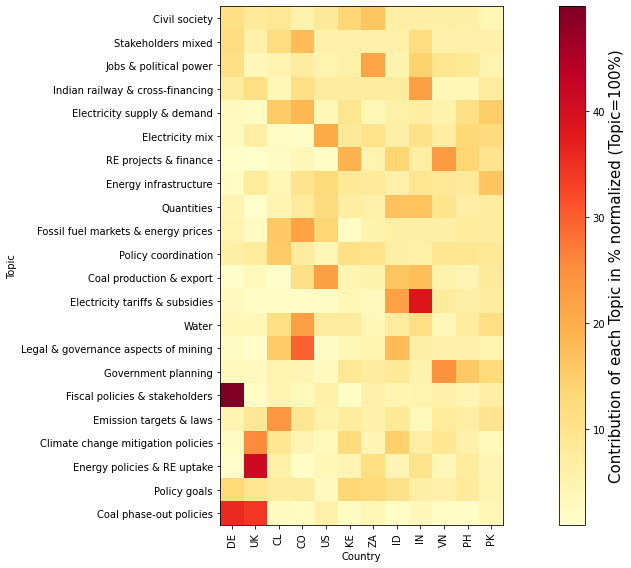

In [82]:
#df_try_tc_t100 is dict_t_and_c[z][x] 
x = 'Country' 
z = 'Topic'
#transpose, so the topic are the rows and the countries are the columns
piv = df_try_tc_t100.drop(columns={x}).transpose()
list_A = list(df_try_tc_t100[x])
# do heatmap, showing the topics/categories and the countries/classification 
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(piv, cmap='YlOrRd')#"Greens")

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
ax.set_xticklabels(list_A, rotation=90, size=var_text_size-5)
list_t_or_c_labels = df_topics_categories['Topic_label']
ax.set_yticklabels(list_t_or_c_labels, size=var_text_size-5)
ax.set_xlabel(x)
ax.set_ylabel(z)

#set label for colorbar
cb = plt.colorbar(im)
cb.set_label('Contribution of each Topic in % normalized (Topic=100%)', size=var_text_size)

# Loop over data dimensions and create text annotations (% on the map)
#for i in range(len(list_t_or_c_labels)):
#    for j in range(len(countries)):
#        text = ax.text(j, i, piv.loc[str(i), j],
#                       ha="center", va="center", color="k")

plt.tight_layout()

for y in ['png', 'svg']: # 
    plt.savefig('.//results//heatmaps//new_20220815//topic_country_t100_'+timestr+'_V01.'+y, \
           bbox_inches="tight") # , dpi=600

plt.show()

In [88]:
#for the actor groups (a)

In [113]:
df_try_ta = dict_t_and_c['Topic']['class'].copy() # 'Topic' / 'Category'
df_try_ta_t100 = df_try_ta.copy()

for n_col in range(1, len(df_try_ta_t100.columns)): #for every column number, so topic (except 0 with class)
    ta_100 = 100/df_try_ta.iloc[:, n_col].sum()
    for m_row in range(0, len(df_try_ta_t100)): #for every row number, so actor group
        df_try_ta_t100.iloc[m_row, n_col] = df_try_ta.iloc[m_row, n_col] * ta_100

In [114]:
df_try_ta_t100

,class,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,econ,24.4,16.666667,23.333333,45.454545,26.027397,27.292576,29.838710,27.272727,37.142857,...,21.935484,30.0,22.072072,18.431373,27.450980,18.518519,17.241379,24.299065,20.567376,23.831776
1,poli,20.2,16.666667,20.000000,18.181818,28.767123,25.982533,14.516129,25.324675,22.857143,...,23.870968,20.0,28.378378,24.313725,30.392157,32.098765,27.586207,29.906542,24.113475,30.373832
2,socint,24.0,33.333333,30.000000,18.181818,20.091324,24.672489,39.919355,26.623377,21.904762,...,22.580645,20.0,21.621622,38.431373,11.764706,26.543210,27.586207,18.691589,32.624113,11.682243
3,socnat,31.4,33.333333,26.666667,18.181818,25.114155,22.052402,15.725806,20.779221,18.095238,...,31.612903,30.0,27.927928,18.823529,30.392157,22.839506,27.586207,27.102804,22.695035,34.112150


In [115]:
df_try_ta_t100.to_csv('.//results//heatmaps//new_20220815//topic_agroup_t100_'+timestr+'V01.csv',
    sep=';', decimal=',')

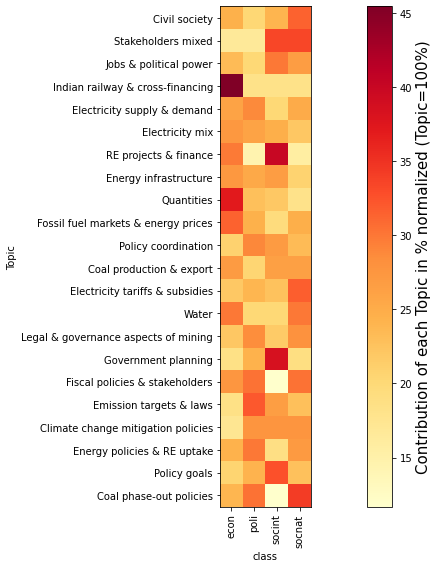

In [116]:
#df_try_ta_t100 is dict_t_and_c[z][x] 
x = 'class' 
z = 'Topic'
#transpose, so the topic are the rows and the countries are the columns
piv = df_try_ta_t100.drop(columns={x}).transpose()
list_A = list(df_try_ta_t100[x])
# do heatmap, showing the topics/categories and the countries/classification 
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(piv, cmap='YlOrRd')#"Greens")

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
ax.set_xticklabels(list_A, rotation=90, size=var_text_size-5)
list_t_or_c_labels = df_topics_categories['Topic_label']
ax.set_yticklabels(list_t_or_c_labels, size=var_text_size-5)
ax.set_xlabel(x)
ax.set_ylabel(z)

#set label for colorbar
cb = plt.colorbar(im)
cb.set_label('Contribution of each Topic in % normalized (Topic=100%)', size=var_text_size)

# Loop over data dimensions and create text annotations (% on the map)
#for i in range(len(list_t_or_c_labels)):
#    for j in range(len(countries)):
#        text = ax.text(j, i, piv.loc[str(i), j],
#                       ha="center", va="center", color="k")

plt.tight_layout()

for y in ['png', 'svg']: # 
    plt.savefig('.//results//heatmaps//new_20220815//topic_country_t100_'+timestr+'_V01.'+y, \
           bbox_inches="tight") # , dpi=600

plt.show()